In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# toolboxes
import cv2
import numpy 
from sklearn.cluster import KMeans

In [3]:
# data
trainX = numpy.load('tinyX.npy') # this should have shape (26344, 3, 64, 64)
trainY = numpy.load('tinyY.npy') 
testX = numpy.load('tinyX_test.npy') # (6600, 3, 64, 64)

In [4]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

In [22]:
#from scipy.misc import imread

#flattenedGrayImages = numpy.zeros([trainX.shape[0],64*64*1])
#for i in range(0,len(trainX)):
#    temp=to_gray(trainX[i].transpose(2,1,0))
#    d1, d2 = temp.shape
#    #temp=trainX[i].transpose(2,1,0)
#    #d1, d2, d3 = temp.shape
    
#    flattenedGrayImages[i] = temp.flatten().reshape(1, d1*d2)
#    #flattenedGrayImages[i] = temp
#print(flattenedGrayImages.shape)
#print(temp.shape)

In [5]:
transposedIMGs = numpy.zeros([trainX.shape[0],64,64,3])
for i in range(0,len(trainX)):
    temp=trainX[i].transpose(2,1,0)
    transposedIMGs[i] = temp
print(transposedIMGs.shape)

transposedTest = numpy.zeros([testX.shape[0],64,64,3])
for j in range(0,len(testX)):
    temp=testX[j].transpose(2,1,0)
    transposedTest[j] = temp
print(transposedTest.shape)

(26344, 64, 64, 3)
(6600, 64, 64, 3)


In [6]:
print(testX.shape)
print(transposedIMGs.shape)
print(trainY.shape)

(6600, 3, 64, 64)
(26344, 64, 64, 3)
(26344,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import MaxPooling2D, BatchNormalization

model = Sequential()

Using Theano backend.
Using gpu device 0: GeForce GTX 750 (CNMeM is disabled, cuDNN not available)


In [8]:
from sklearn.cross_validation import train_test_split
#
input_IMGs = transposedIMGs

training_input, validation_input, training_labels, validation_labels = train_test_split(input_IMGs, trainY, test_size=0.10, stratify=trainY)
#training_input = numpy.delete(training_input, (0), axis=1)
#validation_input = numpy.delete(validation_input, (0), axis=1)
print training_input.shape
print training_labels.shape
print validation_input.shape
print validation_labels.shape

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(23709, 64, 64, 3)
(23709,)
(2635, 64, 64, 3)
(2635,)


In [9]:
# Model 1

from keras.layers import Conv2D, Reshape, Flatten, Dropout, BatchNormalization
model = Sequential()
# first we need to reshape the flat 784 vector into a (n,w,h) image
# MNIST is greyscale so n=1, w=h=28 / n - 1 or 3, w=h=64
#model.add(Reshape((1,64,64), input_shape=(4096,)))

model.add(Reshape((3,64,64), input_shape=(64,64,3)))

#model.add(Reshape((1,64,64), input_shape=(4096,)))

# small filters are usually preferred, here we're going to use 8 3x3 filters
# instead of an Activation layer, we can directly use the 'activation' keyword:
#model.add(Conv2D(8, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(Conv2D(8, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))

model.add(Conv2D(32, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(16, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(Conv2D(16, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(Conv2D(8, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))
#model.add(Conv2D(8, 3, 3, border_mode='same', activation='relu'))
#model.add(Conv2D(8, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Batch Norm usually makes optimization faster, and can be added after some or all layers (except the last!)
model.add(BatchNormalization())
# because of the two layers of subsampling, our output is now 8x16x16
# let's flatten this feature map so we can pass it to dense layers
model.add(Flatten())
model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,
model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,
#model.add(Dense(output_dim=64, activation='relu')) # 64 is number of neurons in this layer,

# could add extra layers here 
model.add(Dropout(0.5)) # Dropout is a good remedy to overfitting
model.add(Dense(output_dim=40, activation='softmax')) # 40 classes again


In [252]:
# Model 2

from keras.layers import Conv2D, Reshape, Flatten, Dropout, BatchNormalization
model = Sequential()

model.add(Reshape((3,64,64), input_shape=(64,64,3)))

model.add(Conv2D(8, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=1))

model.add(Conv2D(8, 3, 3, border_mode='same', subsample=(2,2), activation='relu'))

model.add(BatchNormalization(axis=1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,
model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,

model.add(Dropout(0.5)) # Dropout is a good remedy to overfitting
model.add(Dense(output_dim=40, activation='softmax')) # 40 classes again

In [283]:
# Model 3
from keras.layers import Conv2D, Reshape, Flatten, Dropout, BatchNormalization
model = Sequential()

model.add(Reshape((3,64,64), input_shape=(64,64,3)))

model.add(Conv2D(32, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, 5, 5, border_mode='same', subsample=(2,2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization(axis=1))

#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,
#model.add(Dense(output_dim=128, activation='relu')) # 64 is number of neurons in this layer,

model.add(Dropout(0.5)) # Dropout is a good remedy to overfitting
model.add(Dense(output_dim=40, activation='softmax')) # 40 classes again

In [10]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras_tqdm import TQDMNotebookCallback
training_accuracy = numpy.zeros([250,1])
training_loss = numpy.zeros([250,1])
validation_metrics = numpy.zeros([250,2])
for r in range(0,200):
    temp1 = model.fit(training_input, training_labels, nb_epoch=1, verbose=0, callbacks=[TQDMNotebookCallback()])
    temp = model.evaluate(validation_input, validation_labels)
    validation_metrics[r,:] = temp
    training_accuracy[r] = temp1.history['acc']
    training_loss[r] = temp1.history['loss']
#print(validation_metrics)


2635/2635 [==============================] - 0s     

[[ 0.50660087]
 [ 0.51853726]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     

In [54]:
# train it
from keras_tqdm import TQDMNotebookCallback
history = model.fit(training_input, training_labels, nb_epoch=40, verbose=0, callbacks=[TQDMNotebookCallback()])

In [62]:
# test it!
validation_metrics = model.evaluate(validation_input, validation_labels)
print()
print(validation_metrics)

2592/2635 [============================>.] - ETA: 0s

[ 2.39589645  0.33548387]


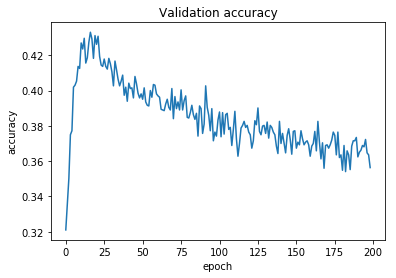

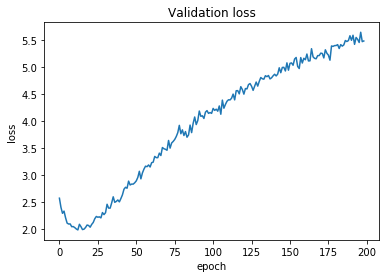

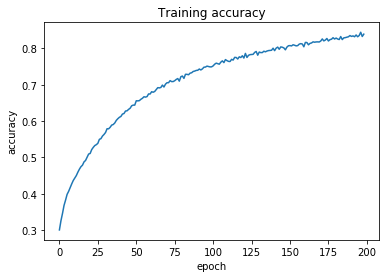

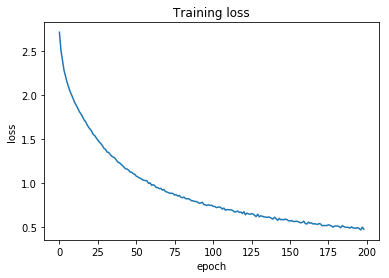

In [22]:
#print(history.history.keys())
import matplotlib.pyplot as plt
#print(history.history['acc'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
print(validation_metrics[1,0:199])
plt.title('Validation accuracy')
plt.plot(validation_metrics[0:199,1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(validation_metrics[0:199,0])
plt.show()
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(training_accuracy[0:199])
plt.show()
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(training_loss[0:199])
plt.show()

In [20]:
numpy.savetxt("validation_metrics_overnight", validation_metrics, delimiter=",")
numpy.savetxt("training_accuracy_overnight", training_accuracy, delimiter=",")
numpy.savetxt("training_loss_overnight", training_loss, delimiter=",")

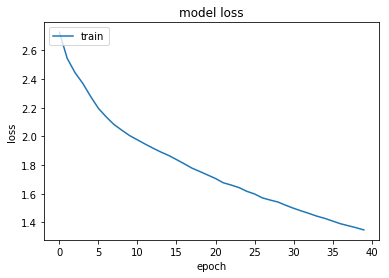

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# Generate function to visualize first layer


In [58]:
predictions = model.predict(transposedTest, batch_size=32, verbose=0)
print(predictions.shape)
print(max(predictions[1]))


(6600, 40)
0.999593


In [59]:
test_predictions = predictions.argmax(axis=1)
print(numpy.transpose(test_predictions))
numpy.savetxt("test_predictions_40", numpy.transpose(test_predictions), delimiter=",")

[ 2  0  0 ..., 20  0 29]


In [210]:
predictions_forVal = model.predict(validation_input, batch_size=32, verbose=0)

In [211]:
print(predictions_forVal.argmax(axis=1))

[10  4  0 ...,  1  0 29]


In [212]:
print(validation_labels)

[10  4  0 ...,  0  4  5]


In [216]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(validation_labels,predictions_forVal.argmax(axis=1))
print(acc)

0.399240986717


In [ ]:
# OLD!

In [55]:
model.add(Dense(output_dim=32, input_dim=(4096)))

In [56]:
model.add(Activation('relu'))

In [57]:
model.add(Dense(output_dim=32))
#model.add(Dense(output_dim=32))
model.add(Activation('relu'))
model.add(Dense(output_dim=40)) # there are 10 classes in MNIST
model.add(Activation('softmax'))

In [58]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# run for a 5 epochs
from keras_tqdm import TQDMNotebookCallback
model.fit(training_input, training_labels,  nb_epoch=5, verbose=0, callbacks=[TQDMNotebookCallback()])

In [61]:
model.evaluate(validation_input,validation_labels)

2592/2635 [============================>.] - ETA: 0s

[14.845774861938361, 0.078937381426794934]

In [ ]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features, [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == learn.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  loss = None
  train_op = None

  # Calculate Loss (for both TRAIN and EVAL modes)
  if mode != learn.ModeKeys.INFER:
    onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=10)
    loss = tf.losses.softmax_cross_entropy(
        onehot_labels=onehot_labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == learn.ModeKeys.TRAIN:
    train_op = tf.contrib.layers.optimize_loss(
        loss=loss,
        global_step=tf.contrib.framework.get_global_step(),
        learning_rate=0.001,
        optimizer="SGD")

  # Generate Predictions
  predictions = {
      "classes": tf.argmax(
          input=logits, axis=1),
      "probabilities": tf.nn.softmax(
          logits, name="softmax_tensor")
  }

  # Return a ModelFnOps object
  return model_fn_lib.ModelFnOps(
      mode=mode, predictions=predictions, loss=loss, train_op=train_op)